In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation 

# Finite difference method 1

In [3]:
def f(x,y):
    return (-2*y-3)

In [4]:
def explicit_euler(f,x0,y0,h,n):
    x=np.zeros(n)
    x[0]=x0
    y=np.zeros(n)
    y[0]=y0
    for i in range(n-1):
        x[i+1]=x[i]+h
        y[i+1]=y[i]+h*f(x[i],y[i])
    return x,y


In [7]:
def implicit_euler(f,x0,y0,h,n):
    x=np.zeros(n)
    x[0]=x0
    y=np.zeros(n)
    y[0]=y0
    for i in range(1,n):
        x[i]=x[i-1]+h
        y[i]=(y[i-1]-3*h)/(1+2*h)
    return x,y

Text(0, 0.5, 'y')

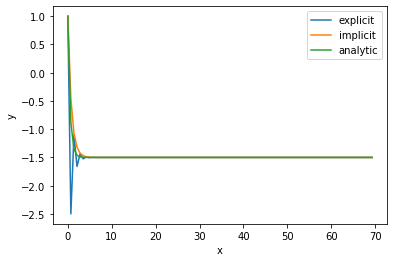

In [10]:
anse1,anse2=explicit_euler(f,0,1,0.7,100)
_anse1,_anse2=implicit_euler(f,0,1,0.7,100)
plt.plot(anse1,anse2,label='explicit')
plt.plot(_anse1,_anse2,label='implicit')

z=2.5*(math.e)**(-2*anse1)-1.5 
plt.plot(anse1,z,label='analytic')
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")


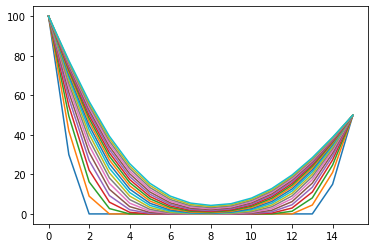

In [11]:
#Q2 Heat equation
u=np.zeros((16,1))
a=np.zeros((16,16))
u[0]=100
u[15]=50
#    print(a)
s=0.3
a[0][0]=1
a[15][15]=1
for i in range(1,15):
    a[i][i-1]=s
    a[i][i]=(1-2*s)
    a[i][i+1]=s
#    print(a)
l=np.arange(16)

for i in range(20):
    u=np.matmul(a,u)
    plt.plot(l,u)


# General function for heat equation (Q2)

In [12]:
def heat(u_bc1,u_bc2,L,N,s,t):
    x=np.linspace(0,L,N)
    A=np.zeros((N,N))
    _s=np.zeros((t,N))
    A[0][0]=1
    A[N-1][N-1]=1
    for i in range(N-2):
        A[i+1][i]=s
        A[i+1][i+1]=1-2*s
        A[i+1][i+2]=s
    u=np.zeros(N)
    u[0]=u_bc1
    u[N-1]=u_bc2
    for i in range(t):
        u=np.matmul(A,u)
        _s[i]=u.copy()
        if i%7==0:
            plt.plot(x,u)
    plt.xlabel("x")
    plt.ylabel("Temperature")
    return _s

Text(0, 0.5, 'time')

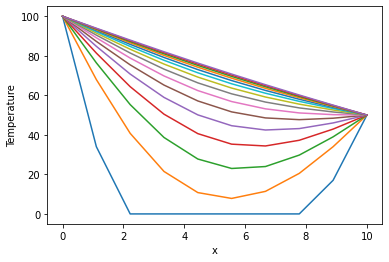

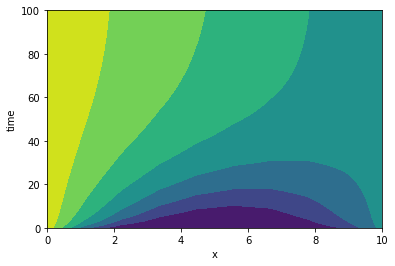

In [15]:
ans=heat(100,50,10,10,0.34,100)
feature_x = np.linspace(0, 10, 10)
feature_y = np.linspace(0, 100, 100)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, ans)
plt.xlabel("x")
plt.ylabel("time")

Text(0, 0.5, 'time')

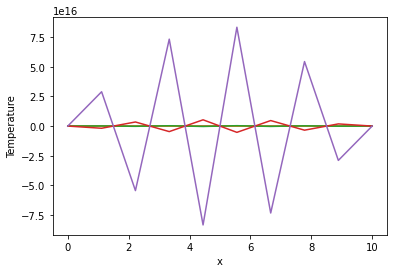

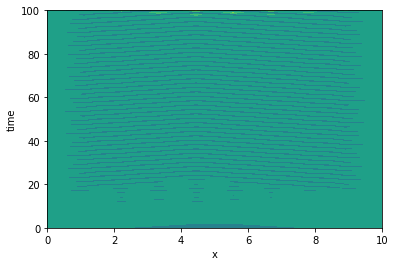

In [16]:
ans=heat(100,50,10,10,0.64,100)
feature_x = np.linspace(0, 10, 10)
feature_y = np.linspace(0, 100, 100)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, ans)
plt.xlabel("x")
plt.ylabel("time")

# Heat Equation 2

In [17]:
def heat_imp(u_bc1,u_bc2,L,N,s,t):
    x=np.linspace(0,L,N)
    A=np.zeros((N,N))
    _s=np.zeros((t,N))
    A[0][0]=1
    A[N-1][N-1]=1
    for i in range(N-2):
        A[i+1][i]=-s
        A[i+1][i+1]=1+2*s
        A[i+1][i+2]=-s
    u=np.zeros(N)
    B=np.linalg.inv(A)
    u[0]=u_bc1
    u[N-1]=u_bc2
    for i in range(t):
        u=np.matmul(B,u)
        _s[i]=u.copy()
        if i%7==0:
            plt.plot(x,u)
    plt.xlabel("x")
    plt.ylabel("Temperature")
    return _s

Text(0, 0.5, 'time')

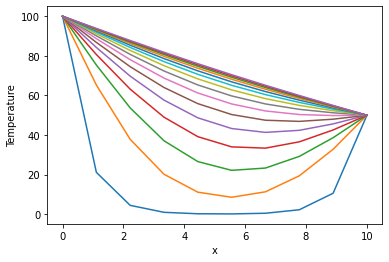

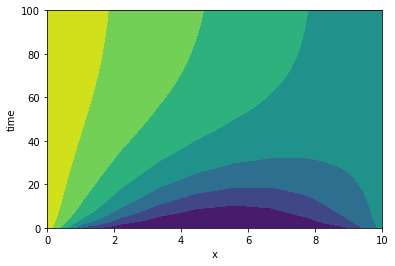

In [18]:
ans=heat_imp(100,50,10,10,0.34,100)
feature_x = np.linspace(0, 10, 10)
feature_y = np.linspace(0, 100, 100)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, ans)
plt.xlabel("x")
plt.ylabel("time")

Text(0, 0.5, 'time')

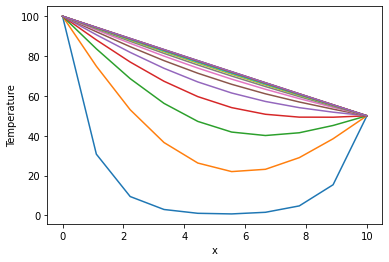

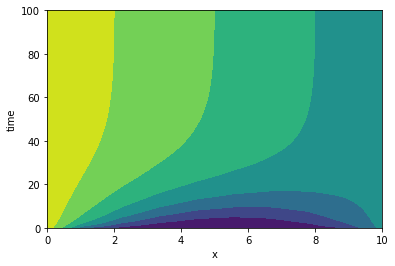

In [19]:
ans=heat_imp(100,50,10,10,0.64,100)
feature_x = np.linspace(0, 10, 10)
feature_y = np.linspace(0, 100, 100)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, ans)
plt.xlabel("x")
plt.ylabel("time")

# Laplace Equation

In [21]:
# General function
def laplace(T_x0,T_xL,T_y0,T_yL,delta,L,e):
    N=int(L/delta)
    t=np.zeros((N,N))
    for i in range(N):
        t[i][0]=T_x0
        t[i][N-1]=T_xL
        t[0][i]=T_yL
        t[N-1][i]=T_y0
    for k in range(10000000):
        T_prev=t.copy()
        for i in range(N-2):
            for j in range(N-2):
                t[i+1][j+1]=(t[i][j+1]+t[i+2][j+1]+t[i+1][j]+t[i+1][j+2])/4
        D=T_prev-t
        max_error=np.amax(D)
        if max_error<e:
            print(k)
            break
    return t

371


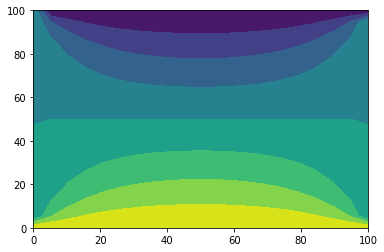

In [24]:
t=laplace(0,0,-100,100,5,100,1e-5)
feature_x = np.linspace(0, 100, 20)
feature_y = np.linspace(0, 100, 20)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, t)

552


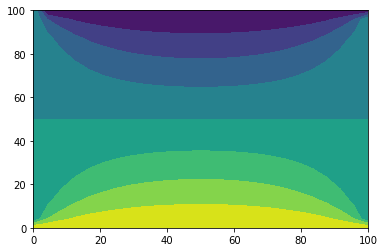

In [27]:
T=laplace(0,0,-100,100,4,100,1e-5)
feature_x = np.linspace(0, 100, 25)
feature_y = np.linspace(0, 100, 25)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, T)

1241


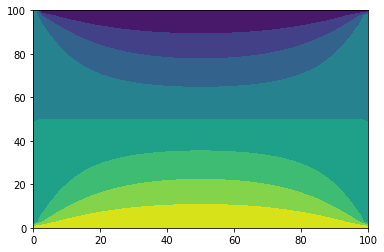

In [28]:
T=laplace(0,0,-100,100,2.5,100,1e-5)
feature_x = np.linspace(0, 100, 40)
feature_y = np.linspace(0, 100, 40)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, T)

1796


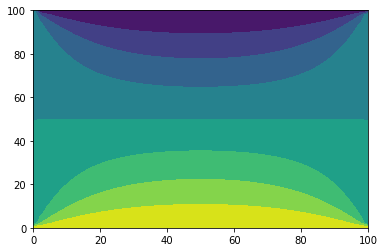

In [29]:
T=laplace(0,0,-100,100,2,100,1e-5)
feature_x = np.linspace(0, 100, 50)
feature_y = np.linspace(0, 100, 50)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)
ax.contourf(X, Y, T)